<a href="https://colab.research.google.com/github/Anna781421/Ribo-seq/blob/main/Ribo_seq_R_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ Ribo-seq. Часть 1.4.

In [1]:
install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("limma")
BiocManager::install("edgeR")
library(edgeR) 

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr', 'testthat',
  'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'edgeR'”
Old pack

In [3]:
BiocManager::install('EnhancedVolcano')
library(EnhancedVolcano)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'bit', 'data.table', 'devtools', 'gert', 'htmltools', 'jsonlite',
  'knitr', 'openssl', 'pkgload', 'roxygen2', 'sass', 'stringr', 'testthat',
  'tidyverse', 'vctrs', 'whisker', 'xfun', 'boot', 'foreign'

Loading required package: ggplot2

Loading required package: ggrepel



In [4]:
install.packages('dendextend')
library('dendextend')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


---------------------
Welcome to dendextend version 1.16.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




In [5]:
install.packages('gplots')
library("gplots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




## Загрузка подготовленных в питоне сетов данных с RNA и RPF каунтами и аннотации к ним. 

In [6]:
RNA_data = read.csv('RNA_data.tsv', header = TRUE, row.names = 1, sep = "\t")
RPF_data = read.csv('RPF_data.tsv', header = TRUE, row.names = 1, sep = "\t")
head(RNA_data, 3)

,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RNA,LC034.tumor.RNA,LC501.normal.RNA,LC501.tumor.RNA,LC502.normal.RNA,LC502.tumor.RNA,LC505.normal.RNA,LC505.tumor.RNA,LC506.normal.RNA,LC506.tumor.RNA,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RNA,LC509.tumor.RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,402,873,301,1627,258,65,226,353,208,399,153,361,157,333,218,457,200,889,161,857
ENSG00000000005.5,0,1,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419.12,88,187,66,201,80,16,54,165,57,174,61,155,104,114,92,170,60,244,56,83


In [7]:
RNA_data = as.matrix(RNA_data)
RPF_data = as.matrix(RPF_data)

In [8]:
RNA_mdata = read.csv('RNA_mdata.tsv', header = TRUE, row.names = 1, sep = "\t")
RPF_mdata = read.csv('RPF_mdata.tsv', header = TRUE, row.names = 1, sep = "\t")
head(RNA_mdata, 3)

,tissue
,<chr>
LC001-normal-RNA,normal
LC001-tumor-RNA,tumor
LC033-normal-RNA,normal


Удалим гены с низким покрытием. Оставим гены (17110 и 15739 для RNA-Seq и RPF-Seq, соответственно) у которых покрытие не менее 10 ридов.

In [9]:
table(apply(RNA_data,1,sum)>9) 
RNA_data = RNA_data[apply(RNA_data,1,sum)>9,]

table(apply(RPF_data,1,sum)>9) 
RPF_data = RPF_data[apply(RPF_data,1,sum)>9,]


FALSE  TRUE 
 1835 17110 


FALSE  TRUE 
 3206 15739 

# Поиск дифференциально экспрессированных генов по RNA-Seq между нормой и опухолью с помощью edgeR.

In [10]:
edger_RNA = DGEList(RNA_data) 
edger_RNA = calcNormFactors(edger_RNA,method='RLE') 

edger_RPF = DGEList(RPF_data) 
edger_RPF = calcNormFactors(edger_RPF,method='RLE') 
# проводим нормализацию

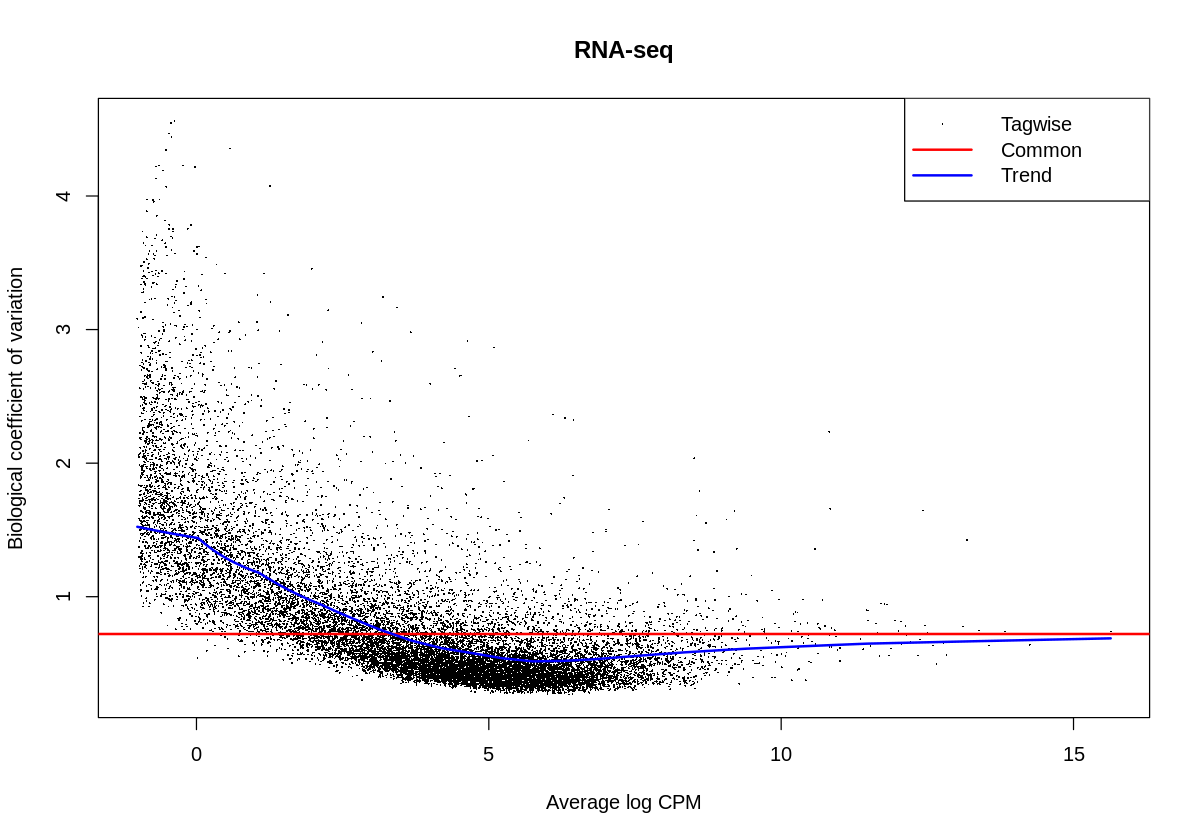

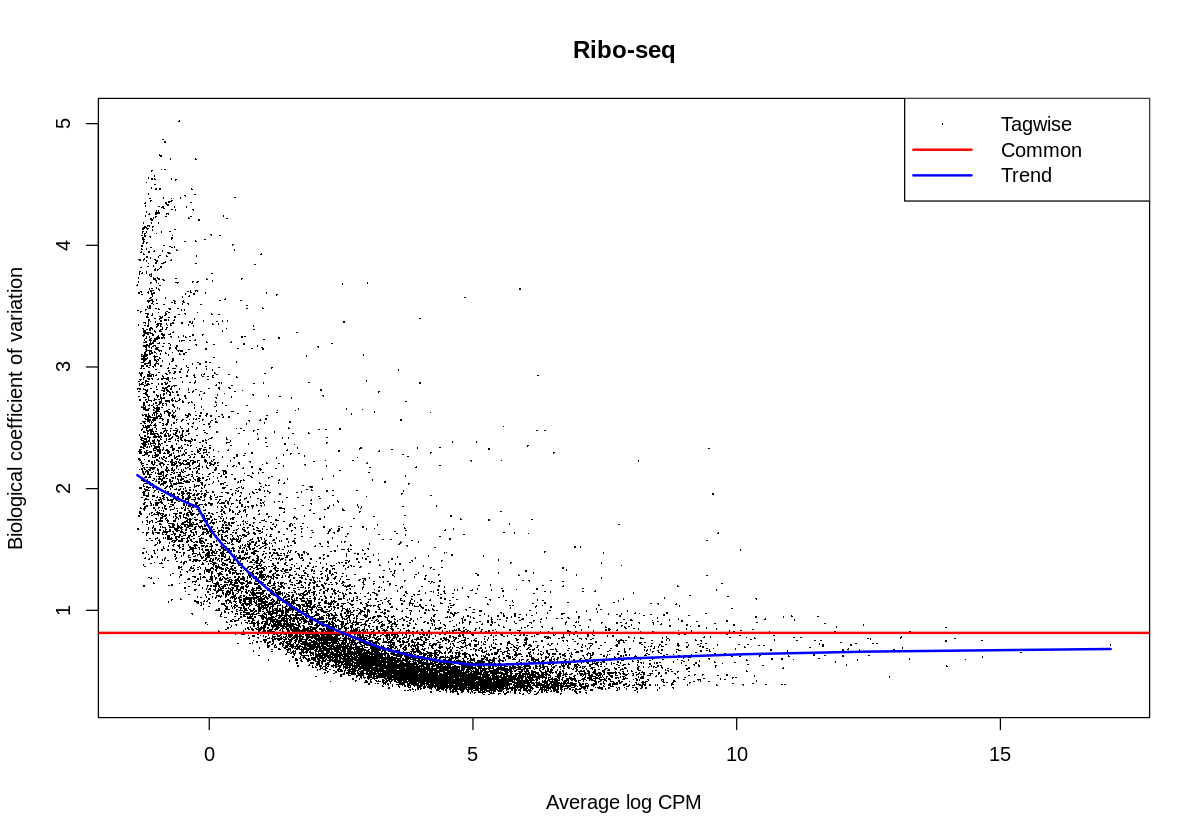

In [11]:
options(repr.plot.width=10, repr.plot.height=7)
design_RNA = model.matrix(~ tissue, data = RNA_mdata)
edger_RNA = estimateDisp(edger_RNA,design_RNA) 
plotBCV(edger_RNA, main='RNA-seq')

design_RPF = model.matrix(~ tissue, data = RPF_mdata)
edger_RPF = estimateDisp(edger_RPF,design_RPF) 
plotBCV(edger_RPF, main='Ribo-seq')

In [12]:
glm_RNA = glmFit(edger_RNA,design_RNA)
glm_RPF = glmFit(edger_RPF,design_RPF)

In [13]:
RNA_def = glmLRT(glm_RNA,2)$table
RNA_def['p_adj'] = apply(cbind(tissue = glmLRT(glm_RNA,2)$table$PValue),2,p.adjust,m='BH') # поправка на множественное тестирование
head(RNA_def, 3)

,logFC,logCPM,LR,PValue,p_adj
,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
ENSG00000000003.14,1.0166187,6.466914,6.650321,0.009913796,0.04150356
ENSG00000000419.12,0.6358763,4.545700,3.787161,0.051647188,0.13870403
ENSG00000000457.13,0.3046761,4.527073,1.376023,0.240779802,0.40757246


In [14]:
apply(RNA_def['p_adj'] < 0.05,2,sum) # количество генов для RNA-seq со значимостью p-value < 0.05

p_adj 
 4362

In [15]:
most_def_RNA = rownames(RNA_def[order(RNA_def['p_adj'])[1:10], ]) # топ-10 дифференциально экспрессированных гена на основе p-value
RNA_def[order(RNA_def['p_adj'])[1:10], ] # гены со значимостью p-value < 0.05

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


,logFC,logCPM,LR,PValue,p_adj
,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
ENSG00000182566.12,-6.189826,5.358956,132.01109,1.487855e-30,2.545721e-26
ENSG00000138315.12,-4.182526,5.501085,104.04973,1.973010e-24,1.687910e-20
ENSG00000126759.12,-3.759572,4.857902,91.80578,9.561478e-22,4.089922e-18
ENSG00000166148.3,-4.824864,5.562908,92.28606,7.501088e-22,4.089922e-18
ENSG00000160339.15,-5.671990,5.075827,88.45859,5.191032e-21,1.776371e-17
ENSG00000087237.10,-3.429853,4.273564,86.33817,1.516531e-20,4.324641e-17
ENSG00000104938.16,-5.753980,4.202864,85.26752,2.606096e-20,5.573787e-17
ENSG00000163687.13,-2.857427,5.714957,85.41355,2.420564e-20,5.573787e-17
ENSG00000129965.13,-5.931558,6.813033,80.70607,2.619159e-19,4.979313e-16


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


По данным RNA-seq было выделено 4362 дифференциально экспрессированных гена  между нормой и опухолью. Топ-10 по значению p_adj выведены в виде таблицы. 

In [16]:
RPF_def = glmLRT(glm_RPF,2)$table
RPF_def['p_adj'] = apply(cbind(tissue = glmLRT(glm_RPF,2)$table$PValue),2,p.adjust,m='BH')
apply(RPF_def['p_adj'] < 0.05,2,sum) # количество генов для RNA-seq со значимостью p-value < 0.05
RPF_def[order(RPF_def['p_adj'])[1:10], ]  # топ-10 дифференциально экспрессированных гена на основе p-value
most_def_RPF = rownames(RPF_def[order(RPF_def['p_adj'])[1:10], ])

p_adj 
 2307

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


,logFC,logCPM,LR,PValue,p_adj
,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
ENSG00000087237.10,-3.656776,5.452656,101.26770,8.035561e-24,1.264717e-19
ENSG00000138315.12,-4.120268,6.139293,90.80715,1.583801e-21,1.246372e-17
ENSG00000145850.8,-4.396207,4.443372,88.47680,5.143452e-21,2.698426e-17
ENSG00000104938.16,-5.935194,3.511237,85.59889,2.203988e-20,6.937714e-17
ENSG00000152990.13,-3.786002,6.031651,85.73200,2.060509e-20,6.937714e-17
ENSG00000133800.8,-3.360419,5.471183,79.30675,5.317770e-19,1.394940e-15
ENSG00000145708.10,-4.462407,6.243388,78.68429,7.287266e-19,1.638490e-15
ENSG00000017427.15,-4.517727,4.303090,78.30452,8.831947e-19,1.737575e-15
ENSG00000126759.12,-3.152366,4.046713,76.75054,1.939755e-18,3.392200e-15


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


По данным RNA-seq было выделено 2307 дифференциально экспрессированных гена  между нормой и опухолью. Топ-10 по значению p_adj выведены в виде таблицы. 

# Volcano plot

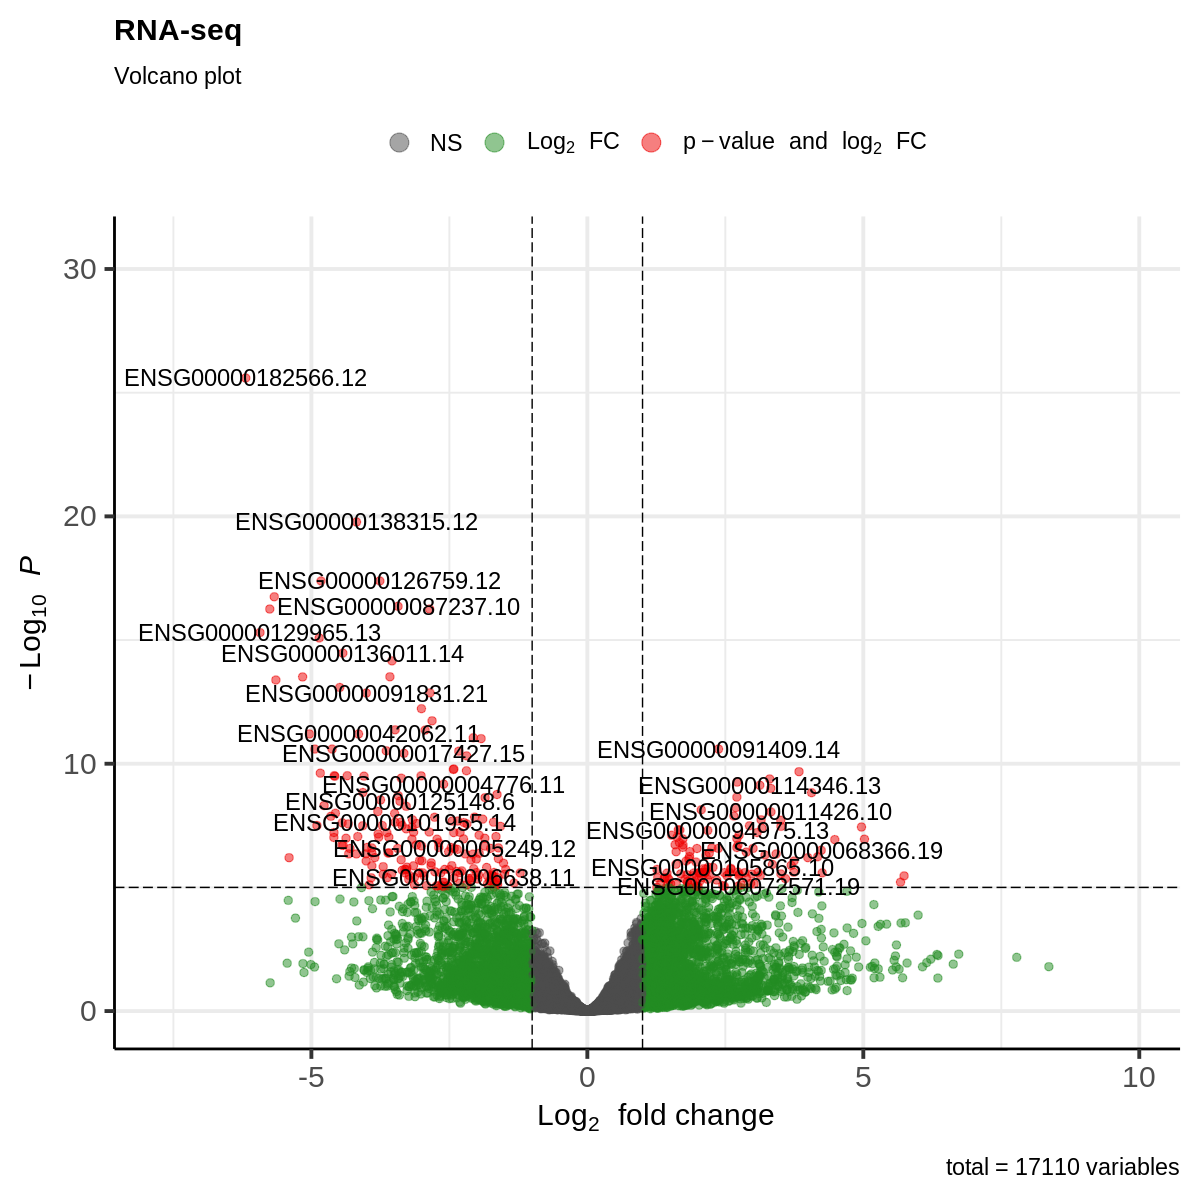

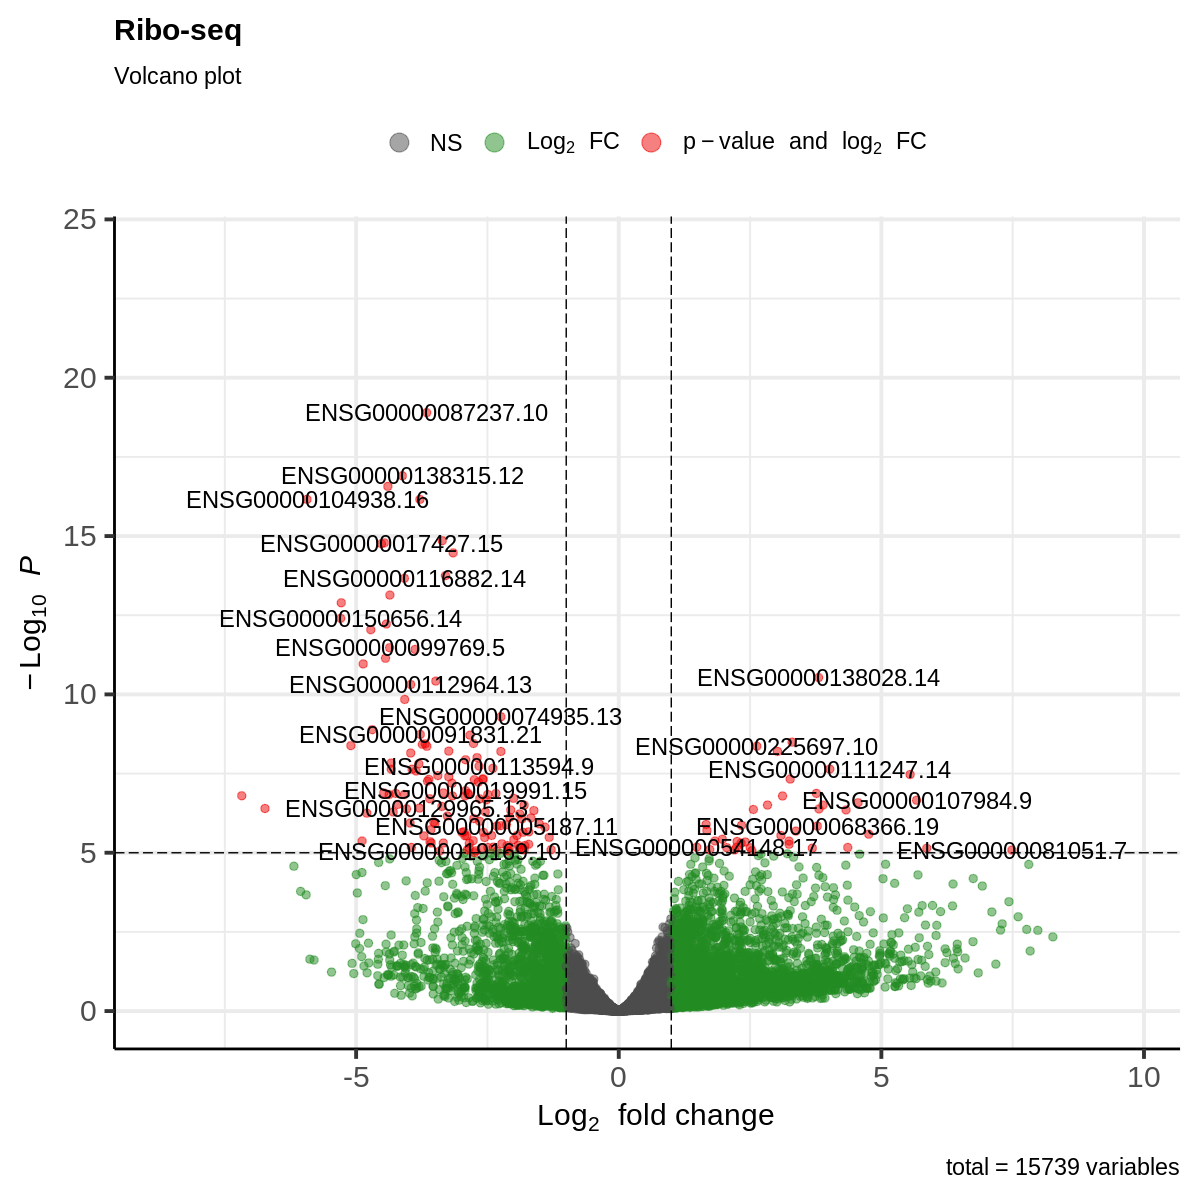

In [17]:
options(repr.plot.height=10)
EnhancedVolcano(RNA_def, x = 'logFC', y = 'p_adj', lab = rownames(RNA_def), title = 'RNA-seq', , subtitle = 'Volcano plot')
EnhancedVolcano(RPF_def, x = 'logFC', y = 'p_adj', lab = rownames(RPF_def), title = 'Ribo-seq', , subtitle = 'Volcano plot')

#Совпадающие для RNA-seq и Ribo-Seq дифференциально экспрессированные гены

In [18]:
most_def_RPF[most_def_RPF %in% most_def_RNA]

[1] "ENSG00000087237.10" "ENSG00000138315.12" "ENSG00000104938.16"
[4] "ENSG00000126759.12" "ENSG00000163687.13"

Было найдено 5 (из топ 10) совпадающих дифференциально экспрессированных генов 

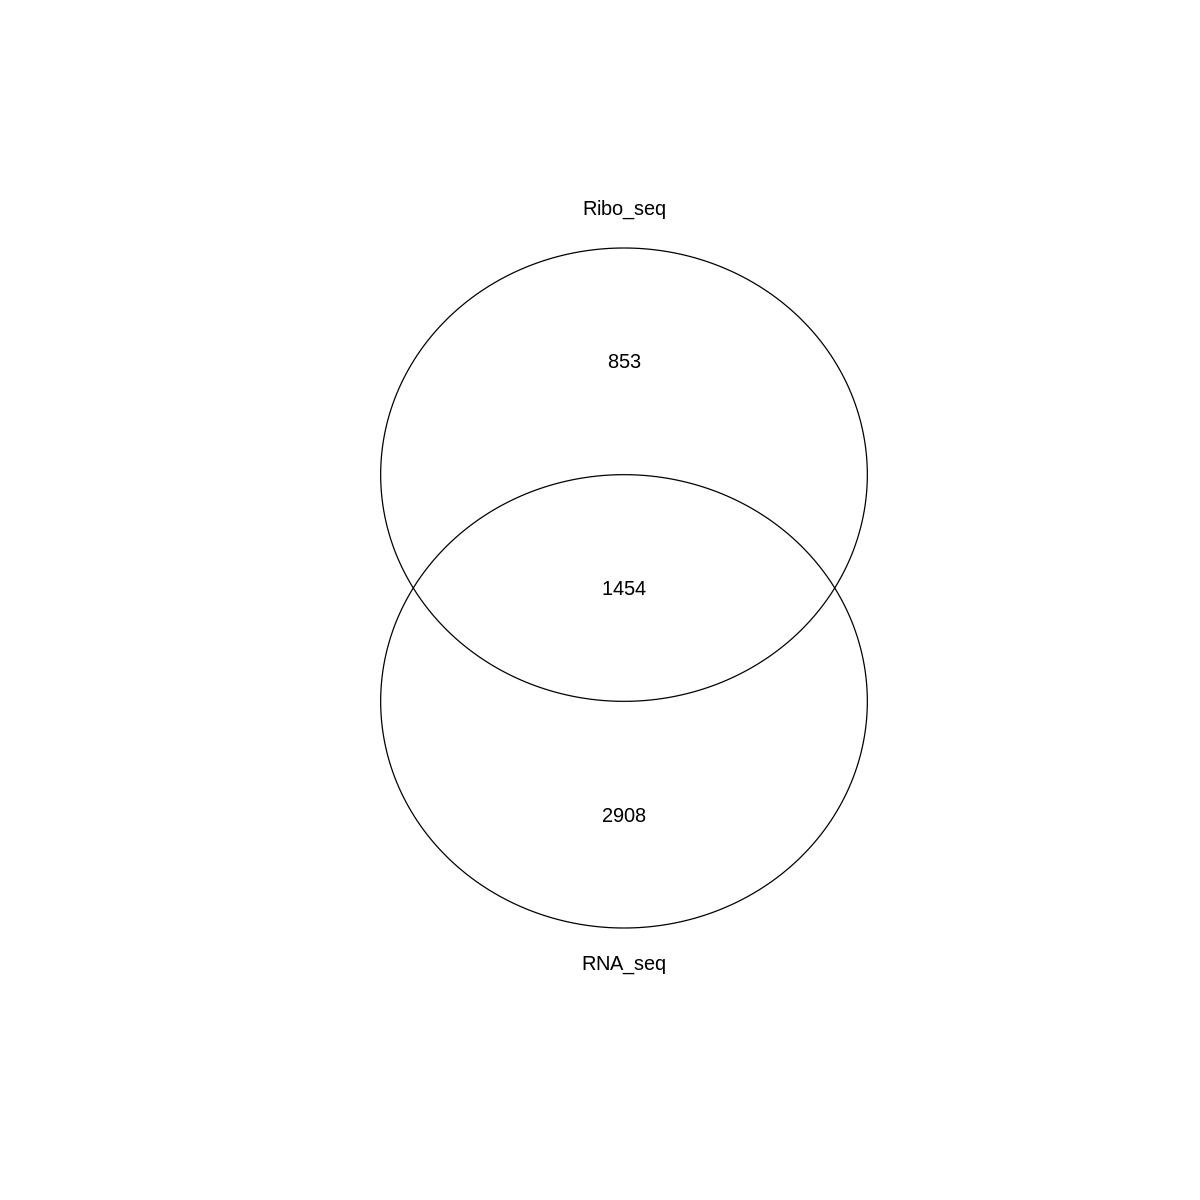

In [19]:
options(repr.plot.height=10)
venn(list(RNA_seq = rownames(RNA_def[RNA_def['p_adj'] < 0.05, ]), Ribo_seq = rownames(RPF_def[RPF_def['p_adj'] < 0.05, ])))

Всего 1454 дифференциально экспрессированных гена совпадают для RNA-seq и Ribo-seq данных. 

# Поиск генов с разницей в эффективности трансляции (~ method + condition + method:condition)

In [20]:
RPF_RNA_data =  read.csv('RPF_RNA_data.tsv', header = TRUE, row.names = 1, sep = "\t")
RPF_RNA_mdata = read.csv('RPF_RNA_mdata.tsv', header = TRUE, row.names = 1, sep = "\t")
head(RPF_RNA_data, 3)

,LC001.normal.RPF,LC001.tumor.RPF,LC001.normal.RNA,LC001.tumor.RNA,LC033.normal.RPF,LC033.tumor.RPF,LC033.normal.RNA,LC033.tumor.RNA,LC034.normal.RPF,LC034.tumor.RPF,⋯,LC507.normal.RNA,LC507.tumor.RNA,LC508.normal.RPF,LC508.tumor.RPF,LC508.normal.RNA,LC508.tumor.RNA,LC509.normal.RPF,LC509.tumor.RPF,LC509.normal.RNA,LC509.tumor.RNA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,0,0,402,873,0,0,301,1627,0,0,⋯,218,457,0,0,200,889,0,0,161,857
ENSG00000000005.5,0,0,0,1,0,0,0,1,0,0,⋯,0,0,1,0,0,0,0,0,0,0
ENSG00000000419.12,168,239,88,187,114,439,66,201,325,117,⋯,92,170,109,357,60,244,141,173,56,83


In [21]:
head(RPF_RNA_mdata, 3)

,condition,method
,<chr>,<chr>
LC001-normal-RPF,normal,RPF
LC001-tumor-RPF,tumor,RPF
LC001-normal-RNA,normal,RNA


In [22]:
RPF_RNA_data = as.matrix(RPF_RNA_data)

In [23]:
RPF_RNA_data = RPF_RNA_data[apply(RPF_RNA_data,1,sum)>9,]

In [24]:
edger_RPF_RNA = DGEList(RPF_RNA_data) 
edger_RPF_RNA = calcNormFactors(edger_RPF_RNA,method='RLE') 

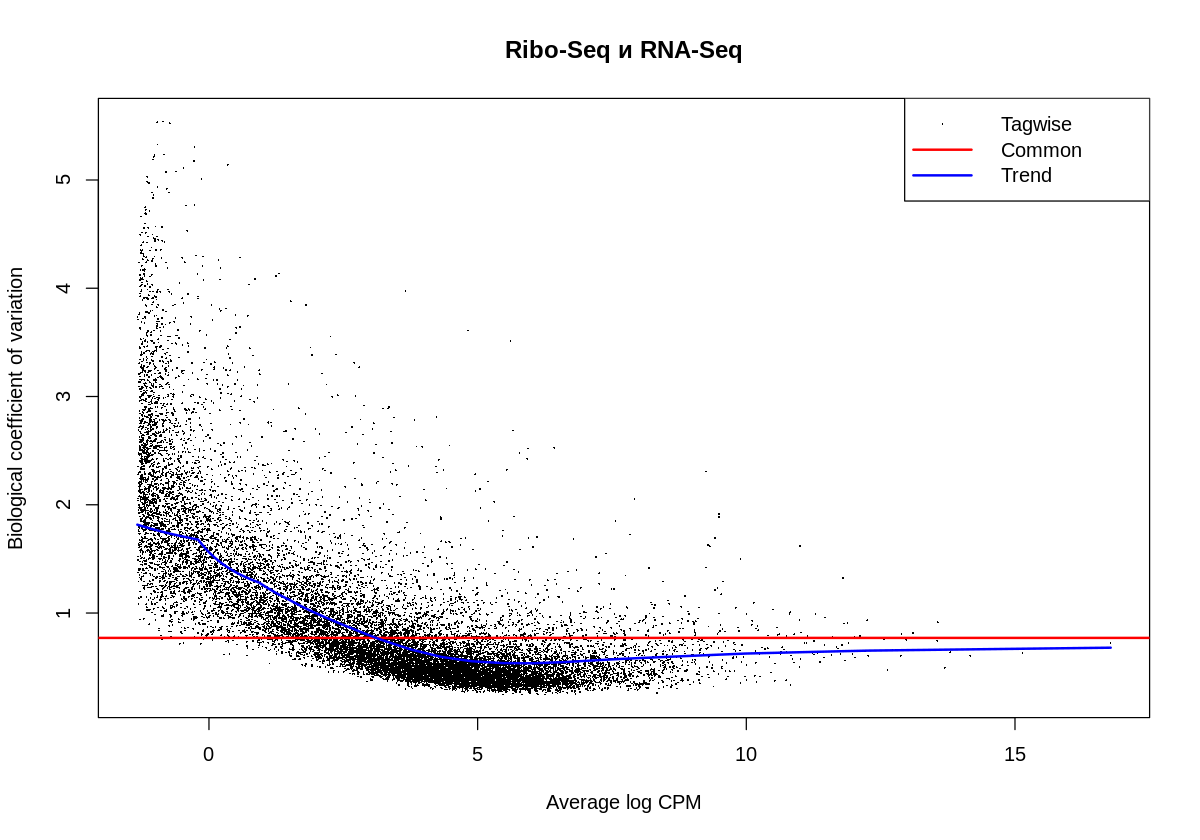

In [25]:
options(repr.plot.width=10, repr.plot.height=7)
design_RPF_RNA = model.matrix(~ method + condition + method:condition, data = RPF_RNA_mdata)
edger_RPF_RNA = estimateDisp(edger_RPF_RNA, design_RPF_RNA) 
plotBCV(edger_RPF_RNA, main='Ribo-Seq и RNA-Seq')

In [26]:
glm_RPF_RNA = glmFit(edger_RPF_RNA,design_RPF_RNA)

In [27]:
RPF_RNA_def = glmLRT(glm_RPF_RNA,4)$table
RPF_RNA_def['p_adj'] = apply(cbind(method_condition = glmLRT(glm_RPF_RNA,4)$table$PValue),2,p.adjust,m='BH')
RPF_RNA_def[order(RPF_RNA_def['p_adj'])[1:10], ]

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


,logFC,logCPM,LR,PValue,p_adj
,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>"
ENSG00000117143.13,-1.851742,6.7293424,22.86528,1.737622e-06,0.01646043
ENSG00000138316.10,5.896813,-0.1011481,22.72693,1.867321e-06,0.01646043
ENSG00000142002.16,2.699872,11.9772965,21.81791,2.997892e-06,0.01761761
ENSG00000180818.4,7.449589,2.4556316,20.57452,5.735453e-06,0.01847914
ENSG00000197558.11,5.460938,2.1285572,20.39817,6.288988e-06,0.01847914
ENSG00000239697.10,5.474580,2.0873681,20.51991,5.901430e-06,0.01847914
ENSG00000172869.14,-1.243511,5.8893857,19.46493,1.024640e-05,0.02569883
ENSG00000176749.8,4.396197,1.1771200,18.79213,1.457676e-05,0.02569883
ENSG00000184434.7,-6.026056,0.8373214,19.06040,1.266457e-05,0.02569883


In [32]:
apply(RPF_RNA_def['p_adj'] < 0.05,2,sum) # количество генов для RNA-seq со значимостью p-value < 0.05

p_adj 
   16

In [28]:
most_def_RPF_RNA = rownames(RPF_RNA_def[order(RPF_RNA_def['p_adj'])[1:10], ])
most_def_RPF_RNA

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


[1] "ENSG00000117143.13" "ENSG00000138316.10" "ENSG00000142002.16"
 [4] "ENSG00000180818.4"  "ENSG00000197558.11" "ENSG00000239697.10"
 [7] "ENSG00000172869.14" "ENSG00000176749.8"  "ENSG00000184434.7" 
[10] "ENSG00000243696.4"

На основании модели ~ method + condition + method:condition было выделено 16 генов с разницей в эффективности трансляции. Топ-10 генов на основании p_adj выведены в таблицe. 

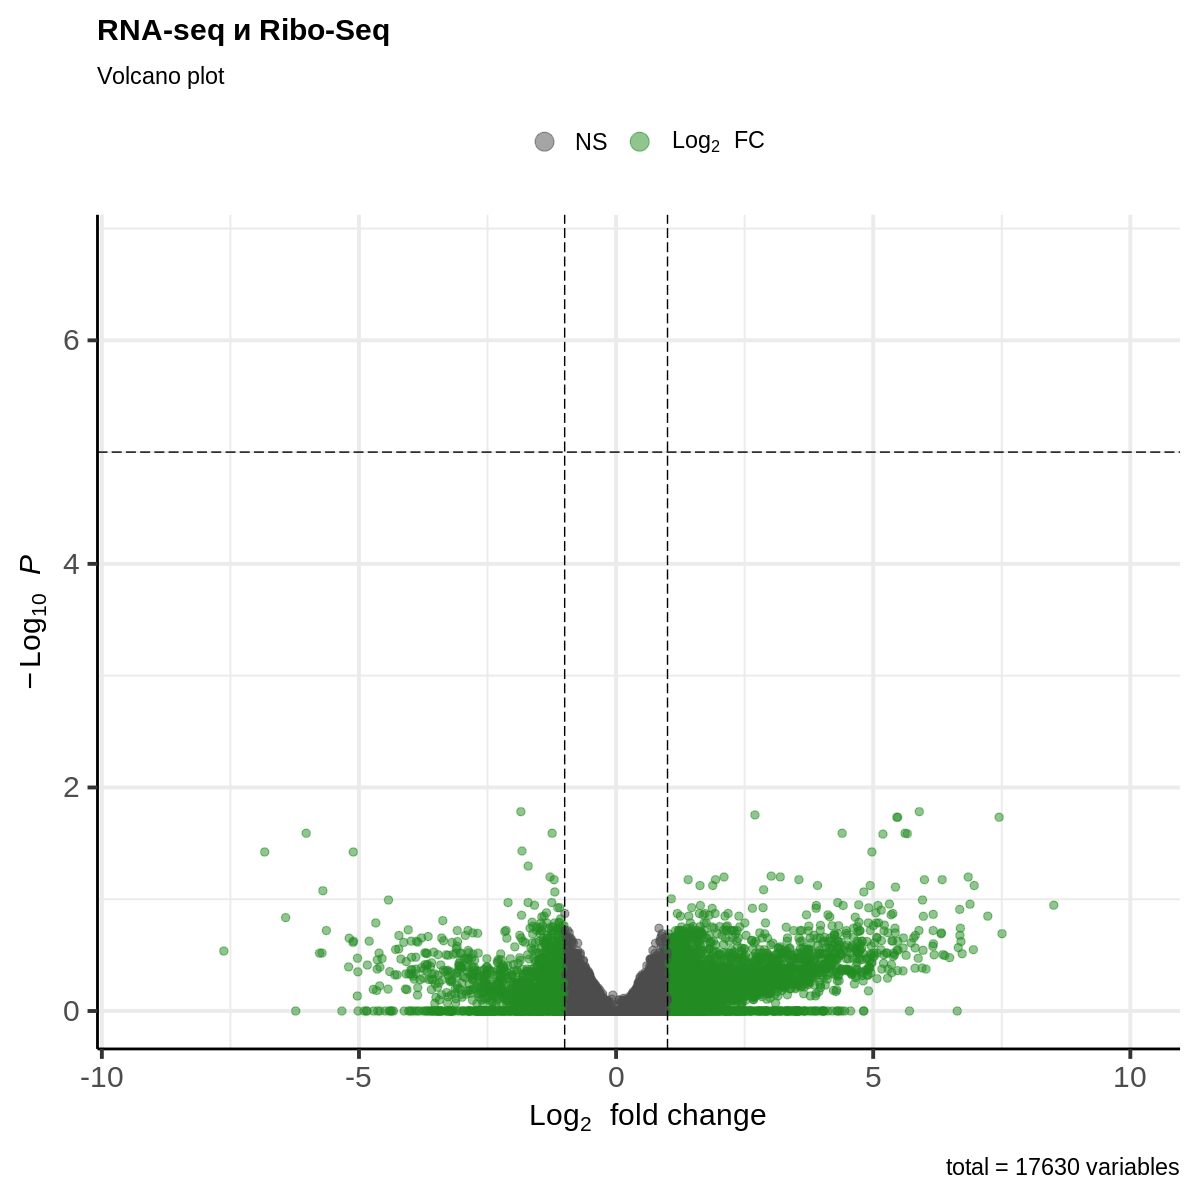

In [29]:
options(repr.plot.height=10)
EnhancedVolcano(RPF_RNA_def, x = 'logFC', y = 'p_adj', lab = rownames(RPF_RNA_def), title = 'RNA-seq и Ribo-Seq', , subtitle = 'Volcano plot')